In [2]:
%cd ../Intrinsic_Clearance/

/Users/pwalters/DATA/ACID_BASE/Intrinsic_Clearance


In [3]:
import pandas as pd
import seaborn as sns
import scikit_posthocs as sp

In [4]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [5]:
df = pd.read_csv("intrinsic_clearnace.csv")

In [6]:
df.head()

,canonical_smiles,molregno,standard_relation,standard_value,standard_units
0,CC(C)COc1ccc(cc1C#N)c2nc(C)c(s2)C(=O)O,647206,<,3.0,mL.min-1.g-1
1,OC(c1ccc(cc1)N(CC(F)(F)F)S(=O)(=O)c2ccccc2)(C(F)(F)F)C(F)(F)F,92776,<,3.0,mL.min-1.g-1
2,OC(=O)CCc1oc(c2ccccc2)c(n1)c3ccccc3,139225,<,3.0,mL.min-1.g-1
3,Cc1cc(C)nc(SCC(=O)N)n1,950646,<,3.0,mL.min-1.g-1
4,CN1CCN(CC(=O)N2c3ccccc3C(=O)Nc4cccnc24)CC1,6772,<,3.0,mL.min-1.g-1


In [8]:
chg_df = pd.read_csv("intrinsic_clearnace_charge.csv")

In [9]:
chg_df.head()

,NAME,ACIDIC,BASIC,STATE_10,STATE_50,STATE_90
0,647206,3.59,0.40,acidic,acidic,acidic
1,92776,7.45,-6.10,acidic,neutral,neutral
2,139225,4.95,-0.59,acidic,acidic,acidic
3,950646,15.28,3.44,neutral,neutral,neutral
4,6772,14.78,7.20,basic,neutral,neutral


In [10]:
combo_df = df.merge(chg_df,left_on="molregno",right_on="NAME")

In [11]:
combo_df.head()

,canonical_smiles,molregno,standard_relation,standard_value,standard_units,NAME,ACIDIC,BASIC,STATE_10,STATE_50,STATE_90
0,CC(C)COc1ccc(cc1C#N)c2nc(C)c(s2)C(=O)O,647206,<,3.0,mL.min-1.g-1,647206,3.59,0.40,acidic,acidic,acidic
1,OC(c1ccc(cc1)N(CC(F)(F)F)S(=O)(=O)c2ccccc2)(C(F)(F)F)C(F)(F)F,92776,<,3.0,mL.min-1.g-1,92776,7.45,-6.10,acidic,neutral,neutral
2,OC(=O)CCc1oc(c2ccccc2)c(n1)c3ccccc3,139225,<,3.0,mL.min-1.g-1,139225,4.95,-0.59,acidic,acidic,acidic
3,Cc1cc(C)nc(SCC(=O)N)n1,950646,<,3.0,mL.min-1.g-1,950646,15.28,3.44,neutral,neutral,neutral
4,CN1CCN(CC(=O)N2c3ccccc3C(=O)Nc4cccnc24)CC1,6772,<,3.0,mL.min-1.g-1,6772,14.78,7.20,basic,neutral,neutral


In [12]:
ab_order = ["acidic","basic","neutral","zwiterionic"]
ab_pal = ["pink","lightblue","lightgreen","violet"]

[Text(0, 0.5, 'Intrinsic Clearance ml/min/g'), Text(0.5, 0, 'Charge State')]

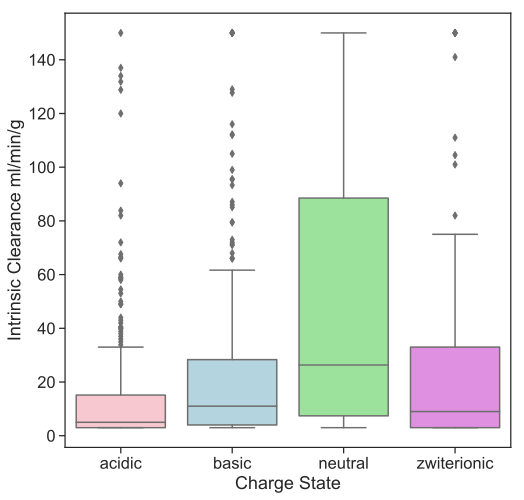

In [17]:
sns.set(rc={'figure.figsize':(8,8)},font_scale=1.5)
sns.set_style('ticks')
ax = sns.boxplot(x="STATE_50",y="standard_value",data=combo_df,order=ab_order,palette=ab_pal)
ax.set(xlabel="Charge State",ylabel="Intrinsic Clearance ml/min/g")

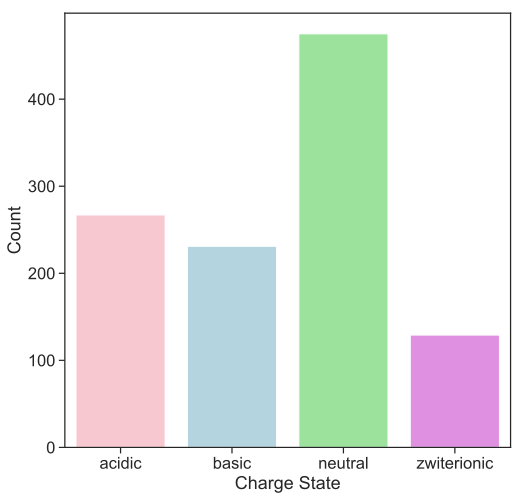

In [14]:
ax = sns.countplot(combo_df.STATE_50,order=ab_order,palette=ab_pal)
_ = ax.set(xlabel="Charge State", ylabel="Count")

In [15]:
combo_df.shape

(1102, 11)

(<matplotlib.axes._subplots.AxesSubplot at 0x118a27f60>,
 <matplotlib.colorbar.ColorbarBase at 0x118c75940>)

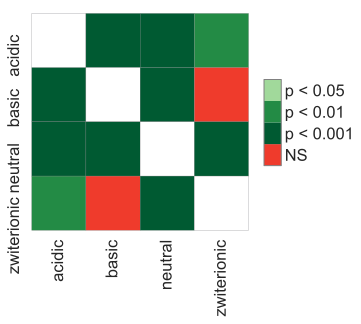

In [16]:
sns.set(rc={'figure.figsize':(6,4)},font_scale=1.5)
pc = sp.posthoc_mannwhitney(combo_df,val_col="standard_value",group_col="STATE_50",p_adjust='holm')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

[Text(0, 0.5, 'Fraction'), Text(0.5, 0, 'Intrinsic Clearance ml/min/g')]

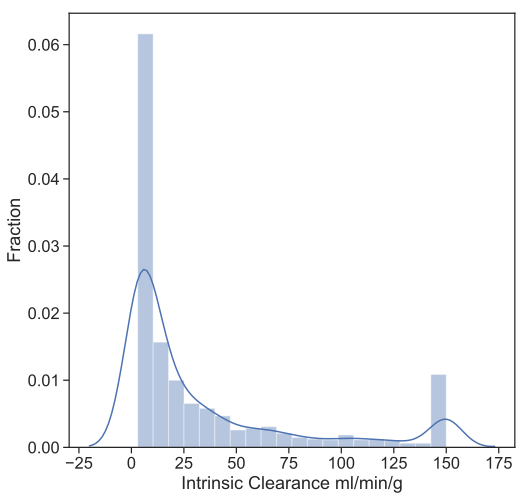

In [18]:
ax = sns.distplot(combo_df.standard_value)
ax.set(xlabel="Intrinsic Clearance ml/min/g",ylabel="Fraction")